# Boston House Prices

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [27]:
data = load_boston()

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

In [66]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

In [67]:
y = pd.Series(data['target'], name='Price')

In [88]:
mean_squared_error(y, LinearRegression().fit(X, y).predict(X))

21.894831181729206

In [68]:
random_index = X.index.tolist()
np.random.shuffle(random_index)

In [69]:
seen, unseen = train_test_split(random_index, train_size=42)

In [75]:
X_1, y_1 = X.loc[seen], y[seen]

In [76]:
X_2, y_2 = X_1[['CRIM']], y_1

# Problem Solving

In [89]:
X_2.shape

(42, 1)

In [82]:
X_2.assign(PRICE=y_2).reset_index(drop=True).head()

,CRIM,PRICE
0,4.26131,22.6
1,0.33045,24.0
2,8.64476,13.8
3,6.39312,13.3
4,0.05735,26.6


In [90]:
LinearRegression().fit(X_2, y_2).score(X_2, y_2)

0.3215262982519745

In [101]:
Xtr, Xte, ytr, yte = train_test_split(X_2, y_2, test_size=10)

In [102]:
LinearRegression().fit(Xtr, ytr).score(Xte, yte)

0.4137476135587489

In [103]:
LinearRegression().fit(Xtr, ytr).score(Xtr, ytr)

0.29712024337487053

In [93]:
y_pred = LinearRegression().fit(X_2, y_2).predict(X_2)

In [94]:
from sklearn.metrics import mean_squared_error

In [97]:
rmse_model = mean_squared_error(y_2, y_pred)**0.5

In [98]:
rmse_human = 21**0.5

In [99]:
rmse_model

7.4460692860983295

In [100]:
rmse_human

4.58257569495584

## Increasing Regularization

In [105]:
from sklearn.linear_model import Ridge, Lasso

In [125]:
y_pred = Lasso(alpha=10).fit(X_2, y_2).predict(X_2)

In [126]:
rmse_model = mean_squared_error(y_2, y_pred)**0.5
rmse_model

7.585378490693042

Actions for model improvement:
- Getting more training examples *
- Change model (polynomial features) *
- Adding new features *
- ~Removing features~
- ~Increase regularization~
- **Decrease regularization**
- Data cleaning?

In [127]:
import matplotlib.pyplot as plt

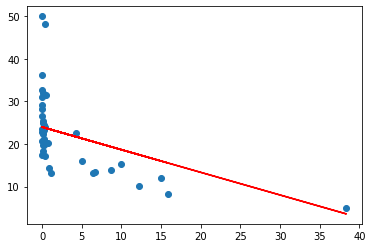

In [131]:
plt.scatter(X_2['CRIM'], y_2)
plt.plot(X_2['CRIM'], y_pred, color='red')

In [133]:
y_2.sort_values(ascending=False).head(2)

186    50.0
233    48.3
Name: Price, dtype: float64

In [135]:
y_pred_d = LinearRegression().fit(X_2.drop([186, 233]), y_2.drop([186, 233])).predict(X_2.drop([186, 233]))

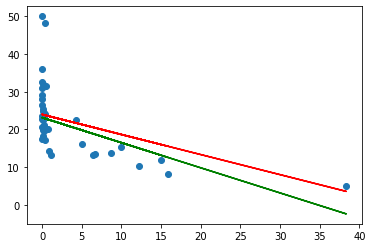

In [136]:
plt.scatter(X_2['CRIM'], y_2)
plt.plot(X_2['CRIM'], y_pred, color='red')
plt.plot(X_2.drop([186, 233])['CRIM'], y_pred_d, color='green')

## Adding Polynomial Features or Changing Model

In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [145]:
model = LinearRegression()
trf = PolynomialFeatures(2, include_bias=False)
y_pred = model.fit(trf.fit_transform(X_2), y_2).predict(trf.fit_transform(X_2))
rmse_model = mean_squared_error(y_2, y_pred)**0.5
rmse_model

7.023779706037676

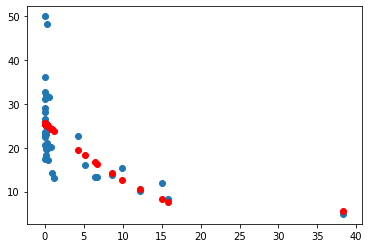

In [146]:
plt.scatter(X_2['CRIM'], y_2)
plt.scatter(X_2['CRIM'], y_pred, color='red')

In [147]:
cv = cross_validate(model, trf.fit_transform(X_2), y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())


,fit_time,score_time,test_score,train_score
0,0.001006,0.000810,0.796693,0.356417
1,0.001493,0.000000,-7.406432,0.352572
2,0.001000,0.001001,0.412988,0.388376
3,0.001000,0.001003,-0.295307,0.392299
4,0.001001,0.001000,-0.078764,0.470472
5,0.000998,0.000999,0.081113,0.398598
6,0.001000,0.001000,-0.164900,0.448246


fit_time       0.001071
score_time     0.000830
test_score    -0.950658
train_score    0.400997
dtype: float64

In [156]:
model = RandomForestRegressor(n_estimators=100, max_depth=2)
cv = cross_validate(model, X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())

,fit_time,score_time,test_score,train_score
0,0.131710,0.007578,0.318251,0.569069
1,0.125197,0.007020,0.678160,0.621010
2,0.140369,0.006017,0.556669,0.584449
3,0.121943,0.006558,0.096273,0.579381
4,0.137297,0.008649,-0.119760,0.647772
5,0.130998,0.006998,0.463611,0.554311
6,0.127722,0.007027,-0.106546,0.637600


fit_time       0.130748
score_time     0.007121
test_score     0.269523
train_score    0.599085
dtype: float64

## Adding new features

In [157]:
X_1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

:Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [171]:
X_2.loc[:, 'RM'] = X_1.loc[:, 'RM']

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [164]:
X_2.head()

,CRIM,RM
359,4.26131,6.112
235,0.33045,6.086
393,8.64476,6.193
475,6.39312,6.162
85,0.05735,6.630


In [165]:
model = LinearRegression()
y_pred = model.fit(X_2, y_2).predict(X_2)
rmse_model = mean_squared_error(y_2, y_pred)**0.5
rmse_model

4.609217262023191

In [166]:
model.fit(X_2, y_2).score(X_2, y_2)

0.7400240152061257

In [167]:
cv = cross_validate(model, X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())

,fit_time,score_time,test_score,train_score
0,0.002999,0.002007,-0.289721,0.788376
1,0.001989,0.000999,-0.022234,0.756141
2,0.003001,0.001999,0.707801,0.742688
3,0.003000,0.000997,0.472675,0.737949
4,0.003001,0.000998,0.756381,0.709335
5,0.002998,0.001000,0.519069,0.747299
6,0.002021,0.001985,0.585922,0.733299


fit_time       0.002716
score_time     0.001426
test_score     0.389985
train_score    0.745012
dtype: float64

In [172]:
X_2.loc[:, 'TAX'] = X_1.loc[:, 'TAX']

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [174]:
X_2.head()

,CRIM,RM,TAX
359,4.26131,6.112,666.0
235,0.33045,6.086,307.0
393,8.64476,6.193,666.0
475,6.39312,6.162,666.0
85,0.05735,6.630,247.0


In [173]:
model = LinearRegression()
y_pred = model.fit(X_2, y_2).predict(X_2)
rmse_model = mean_squared_error(y_2, y_pred)**0.5
rmse_model

3.848079601948034

In [175]:
cv = cross_validate(model, X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())

,fit_time,score_time,test_score,train_score
0,0.004003,0.001999,0.329775,0.842053
1,0.002429,0.002001,0.833894,0.812987
2,0.003000,0.001599,0.792380,0.819645
3,0.002984,0.002018,0.745429,0.812834
4,0.002995,0.002002,0.792747,0.805032
5,0.003011,0.000998,0.500718,0.837340
6,0.002000,0.002001,0.729100,0.809572


fit_time       0.002917
score_time     0.001803
test_score     0.674863
train_score    0.819923
dtype: float64

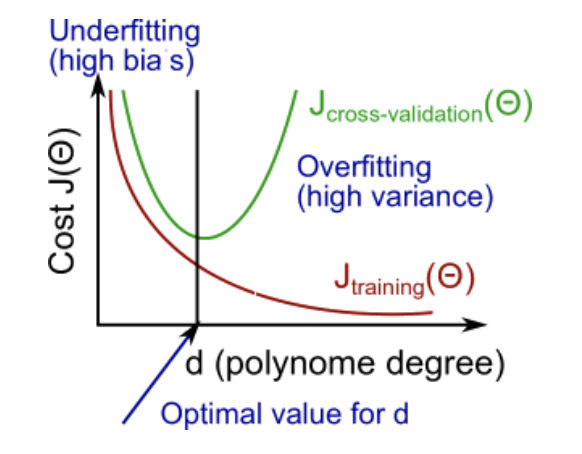

In [182]:
cv = cross_validate(RandomForestRegressor(n_estimators=100, max_depth=28), X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())

,fit_time,score_time,test_score,train_score
0,0.136793,0.006000,0.282772,0.977576
1,0.127000,0.006000,0.814771,0.959667
2,0.132982,0.005999,0.838978,0.965090
3,0.132020,0.006032,0.655113,0.962937
4,0.128830,0.006001,0.672609,0.961365
5,0.127063,0.006001,0.476067,0.972211
6,0.134021,0.008001,0.812180,0.957525


fit_time       0.131244
score_time     0.006290
test_score     0.650356
train_score    0.965196
dtype: float64

In [183]:
X_2.loc[:, 'DIS'] = X_1.loc[:, 'DIS']

C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\berk_\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [184]:
cv = cross_validate(model, X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())

,fit_time,score_time,test_score,train_score
0,0.003995,0.002005,0.315841,0.853486
1,0.002996,0.001000,0.880679,0.818152
2,0.004000,0.000994,0.827842,0.824974
3,0.003000,0.000998,0.490021,0.831624
4,0.002474,0.001001,0.768281,0.824708
5,0.003000,0.001001,0.552095,0.844938
6,0.002000,0.002002,0.759666,0.814062


fit_time       0.003067
score_time     0.001286
test_score     0.656346
train_score    0.830278
dtype: float64

In [185]:
X_2.head()

,CRIM,RM,TAX,DIS
359,4.26131,6.112,666.0,2.5091
235,0.33045,6.086,307.0,3.6519
393,8.64476,6.193,666.0,1.7912
475,6.39312,6.162,666.0,2.2060
85,0.05735,6.630,247.0,4.4377


In [192]:
cv = cross_validate(Lasso(alpha=0.1), X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())

,fit_time,score_time,test_score,train_score
0,0.003019,0.001983,0.326671,0.853127
1,0.002779,0.001464,0.872824,0.817749
2,0.002003,0.000997,0.836145,0.824537
3,0.002707,0.000999,0.490225,0.831265
4,0.003005,0.001003,0.762950,0.824068
5,0.003001,0.001000,0.563570,0.844554
6,0.001979,0.002002,0.744533,0.813516


fit_time       0.002642
score_time     0.001350
test_score     0.656703
train_score    0.829831
dtype: float64

## Adding new samples

In [197]:
X_new, _, y_new, _ = train_test_split(X.loc[unseen], y[unseen], train_size=100)

In [198]:
X_2 = pd.concat([X_2, X_new[X_2.columns]], axis=0)
y_2 = pd.concat([y_2, y_new], axis=0)

In [205]:
model = LinearRegression()
cv = cross_validate(model, X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())
model.fit(X_2, y_2)

,fit_time,score_time,test_score,train_score
0,0.003001,0.002001,0.768419,0.709022
1,0.003004,0.001998,0.804453,0.694207
2,0.003002,0.001981,0.732019,0.714701
3,0.003002,0.002018,0.646255,0.724552
4,0.001999,0.003001,0.566626,0.732949
5,0.003000,0.000997,0.460186,0.730298
6,0.001997,0.002002,0.568681,0.736272


fit_time       0.002715
score_time     0.002000
test_score     0.649520
train_score    0.720286
dtype: float64

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
rf = RandomForestRegressor(n_estimators=100, max_depth=28)
cv = cross_validate(rf, X_2, y_2, cv=7, return_train_score=True)
display(pd.DataFrame(cv))
display(pd.DataFrame(cv).mean())
rf.fit(X_2, y_2)

,fit_time,score_time,test_score,train_score
0,0.193932,0.012000,0.849831,0.978402
1,0.150227,0.007019,0.901547,0.973285
2,0.150372,0.006472,0.801075,0.980007
3,0.165399,0.006998,0.901923,0.970802
4,0.194466,0.007000,0.440944,0.981774
5,0.188956,0.007000,0.701433,0.977627
6,0.166996,0.007000,0.831881,0.977178


fit_time       0.172907
score_time     0.007641
test_score     0.775519
train_score    0.977011
dtype: float64

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [209]:
model.score(X[X_2.columns], y)

0.5463173306160674

In [210]:
rf.score(X[X_2.columns], y)

0.7222289553033676

In [248]:
from sklearn.datasets import load_boston
data = load_boston()
A = pd.DataFrame(data['data'], columns=data['feature_names'])
b = pd.Series(data['target'], name='MEDV')

In [249]:
index = A.index.tolist()

In [250]:
np.random.shuffle(index)

In [251]:
b.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [252]:
b[[4, 0]]

4    36.2
0    24.0
Name: MEDV, dtype: float64

In [253]:
A = A.loc[index, :]
b = b.loc[index]

In [254]:
A.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
388,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
311,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


In [255]:
trains = []
tests = []
for m in range(18, A.shape[0], 5):
    x = A.iloc[:m]
    y = b.iloc[:m]
    model = LinearRegression()
    cv = cross_validate(model, x, y, cv=min(m, 7), return_train_score=True)
    trains.append(cv['train_score'].mean())
    tests.append(cv['test_score'].mean())

Text(0.5, 0, 'Training set size')

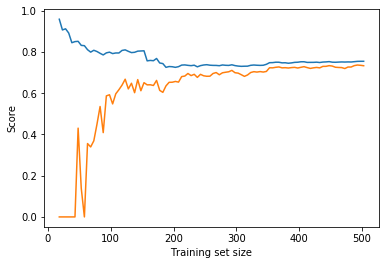

In [256]:
plt.plot(range(18, A.shape[0], 5), trains)
plt.plot(range(18, A.shape[0], 5), np.clip(tests, 0, np.inf))
plt.ylabel('Score')
plt.xlabel('Training set size')

In [259]:
trains = []
tests = []
for n in range(1, A.shape[1]):
    x = A.iloc[:, :n]
    y = b
    model = LinearRegression()
    cv = cross_validate(model, x, y, cv=7, return_train_score=True)
    trains.append(cv['train_score'].mean())
    tests.append(cv['test_score'].mean())

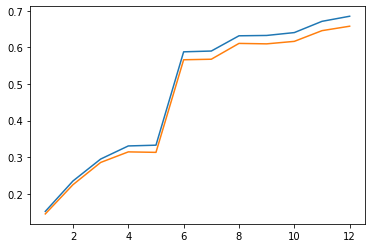

In [260]:
plt.plot(range(1, A.shape[1]), trains)
plt.plot(range(1, A.shape[1]), np.clip(tests, -10, np.inf))

- **Getting more training examples:** Fixes high variance
- **Trying smaller sets of features:** Fixes high variance
- **Adding features:** Fixes high bias
- **Adding polynomial features:** Fixes high bias
- **Decreasing λ:** Fixes high bias
- **Increasing λ:** Fixes high variance.